# Lab 3
Exploratory Data Analysis

### Learning objectives
Upon successful completion of this lab, you will have demonstrated the abilities to:
1. Describing numeric and categorical distributions
2. Estimating correlation and association
3. Working with different data types and doing type conversions
4. Working with Strings and String Processing
5. Testing mean differences in groups
6. Visualizing distributions, relationships, and groups




In [ ]:
import pandas as pd
customer = pd.read_csv('customer_demographics.csv')
customer.dtypes

,0
Education,object
customer_id,int64
AGE,float64
marital,object
JOB,object


1. Print the first five records from the customer dataframe to get an idea about the data.

In [ ]:
customer.head()

,Education,customer_id,AGE,marital,JOB
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


2.Change customer_id type to category. Then print the types of all columns.

In [ ]:
customer['customer_id'] = customer['customer_id'].astype('category')
customer.dtypes

,0
Education,object
customer_id,category
AGE,float64
marital,object
JOB,object


3. Convert all the column names to lowercase.

In [ ]:
customer.columns = customer.columns.str.lower()
customer

,education,customer_id,age,marital,job
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar
...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired
10574,secondary,145306,25.0,single,technician
10575,tertiary,145307,51.0,married,technician
10576,primary,145308,71.0,divorced,retired


4. Change the customer_id of the first two records to 1001036.

In [ ]:
# This question will not be included as a full mark - if you got this incorrect, you will get no marks lost.
# If you got this correct, I will count it as bonus marks

#since customer_id has been made into a category column, if we have a new category, we have to add it as shown below
customer['customer_id'] = customer['customer_id'].cat.add_categories([1001036])

# we can then use loc to update the values. If we tried doing this loc line, without adding the new customer_id
# as part of the category, we would get an error. This is a characteristic specific to categorical columns.
customer.loc[0:1, 'customer_id'] = 1001036
customer

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar
...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired
10574,secondary,145306,25.0,single,technician
10575,tertiary,145307,51.0,married,technician
10576,primary,145308,71.0,divorced,retired


5.Check if the first customer id matches the pattern.
- Define a pattern that checks for exactly 6 digits in a string
- Compile the 6-digits pattern in a variable p.
- Call the p.match() by passing the first customer id as argument. Use customer.iloc[0,1] which is the customer in the first row of the the dataframe.
- print the return value.

In [ ]:
# I did not show you how to create a pattern - I will give half marks if you
# were able to find you needed to use regular expression (regex) here.
# Full marks if you give me the answer below (ie. None, or false)

#importing regex, package name re
import re
#creating a pattern p, by using re.compile, and using regex notation to define what a 6-digit string looks like
p = re.compile(r'^\d{6}$')
#using p.match and passing the new customer_id we created, to see if it matches our pattern
print(p.match(customer.iloc[0,1].astype(str)))
# IT SHOULD NOT MATCH - our new customer_id is more than 6 digits long! Which is why our output is None
# try this out with a different row (ie. .iloc[7,1]) - this should give you a non-None answer!

None


6.Check if all customer id values match the pattern.
- Compile the 6-digits pattern in a variable p.
- Use map() function and pass p.match as predicate function/first argument and the customer_id column as second argument.
- Wrap the return value in a list named customer_id_m.
- write a for loop, that will iterate through the matches list (customer_id_m), and print a message if there is no match.

Expected output:

customer id 1001036 in row 1 : does not match the pattern
customer id 1001036 in row 2 : does not match the pattern

In [ ]:
'''
 for loops and mapping are concepts I did not teach either.
 Since these are fairly advanced in comparison to what I did teach, this will be treated as a bonus question.
'''

#repeat the same steps from Question 5
p = re.compile(r'^\d{6}$')
customer_id_m = list(map(p.match, customer['customer_id'].astype(str)))

#for loop will iterate through each row of our customer_id_m list, check if there is a None (like we saw in the answer anbove)
# and if there is a None, will print the error message
for i in range(len(customer_id_m)):
    if customer_id_m[i] == None:
        print(f'customer id {customer.iloc[i,1]} in row {i+1} : does not match the pattern')

customer id 1001036 in row 1 : does not match the pattern
customer id 1001036 in row 2 : does not match the pattern


7.Check and treat errors in the education column.
- Display the list of unique values for  education
- lowercase all values under the education column. use mydf[colname].str.lower(). Keep the original column 'education' and add a new column named 'education_lowercase'.
- after lowercasing, display the list of unique values for  education_lowercase column.

In [ ]:
print(customer['education'].unique())
# we see secondary appears twice - as all caps, and as lowercase
customer['education_lowercase'] = customer['education'].str.lower()
print(customer['education_lowercase'].unique())

['secondary' 'tertiary' 'primary' 'unknown' 'SECONDARY']
['secondary' 'tertiary' 'primary' 'unknown']


9.Copy values between columns and Drop columns
- Assign the education_lower values to education.
- drop the education_lowercase column
- show the top rows of the dataset.

In [ ]:
customer['education'] = customer['education_lowercase']
customer = customer.drop(columns=['education_lowercase'])
customer.head()

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


9.Find and correct errors in the job column.  
- show the list of unique values under the job column. Use value_counts() method.
- admin. and ADMINISTRATION should refer to the same category level. replace all ADMINISTRATION occurrences with 'admin.' Use the replace() method. syntax: mydataframe.columnname.replace(oldvalue, newvalue)
- after you make the changes, show again the list of unique values under the job column.

ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace

In [ ]:
print(customer['job'].value_counts())
# we see admin. and ADMINISTRATION, which should be the same value
customer['job'] = customer['job'].replace('ADMINISTRATION', 'admin.')
print(customer['job'].value_counts())

job
management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: count, dtype: int64
job
management       2391
blue-collar      1914
technician       1768
admin.           1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: count, dtype: int64


10. Add a new column to the dataframe by taking the first 3 letters of the marital column.
- Note: you should lowercase all values for the marital column.


In [ ]:
customer['marital'] = customer['marital'].str.lower()
customer['marital_first3'] = customer['marital'].str[:3]
customer.head()

,education,customer_id,age,marital,job,marital_first3
0,secondary,1001036,33.0,married,entrepreneur,mar
1,tertiary,1001036,35.0,married,management,mar
2,primary,100118,57.0,married,blue-collar,mar
3,primary,100119,60.0,married,retired,mar
4,secondary,100121,28.0,married,blue-collar,mar


11.Add a dummy variable
- Add a new column marital_b to the dataframe that takes the value 0 if marital is single, 1 if marital is married and 2 if marital is divorced.
- Hint: use the replace method on the required column and pass a dictionary of oldValue:newValue items for replacement.  


In [ ]:
customer['marital_b'] = customer['marital'].replace({'single':0, 'married':1, 'divorced':2})
customer.head()

,education,customer_id,age,marital,job,marital_first3,marital_b
0,secondary,1001036,33.0,married,entrepreneur,mar,1
1,tertiary,1001036,35.0,married,management,mar,1
2,primary,100118,57.0,married,blue-collar,mar,1
3,primary,100119,60.0,married,retired,mar,1
4,secondary,100121,28.0,married,blue-collar,mar,1


12.Customized binning
- add a new column age_group based on age. If age is <35, age_group is set to young. if age between 36 and 55, the age_group is set to 'middle'. if age is >55, age_group is set to 'senior'.

    Use conditional assignment: https://datatofish.com/if-condition-in-pandas-dataframe/

This is the general structure that you may use to create the IF condition:

    df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

In [ ]:
# there are other ways to do this, I will accept any correct answer
customer.loc[customer['age'] < 35, 'age_group'] = 'young'
customer.loc[(customer['age'] >= 36) & (customer['age'] <= 55), 'age_group'] = 'middle'
customer.loc[customer['age'] > 55, 'age_group'] = 'senior'
customer

,education,customer_id,age,marital,job,marital_first3,marital_b,age_group
0,secondary,1001036,33.0,married,entrepreneur,mar,1,young
1,tertiary,1001036,35.0,married,management,mar,1,nan
2,primary,100118,57.0,married,blue-collar,mar,1,senior
3,primary,100119,60.0,married,retired,mar,1,senior
4,secondary,100121,28.0,married,blue-collar,mar,1,young
...,...,...,...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired,mar,1,senior
10574,secondary,145306,25.0,single,technician,sin,0,young
10575,tertiary,145307,51.0,married,technician,mar,1,middle
10576,primary,145308,71.0,divorced,retired,div,2,senior


13.Download the Boston Housing dataset from https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
Read the csv file into a dataframe called boston.
Print the first 5 records from the boston dataframe.

In [ ]:
boston = pd.read_csv('BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


14.Show the quantile table for the numerical columns of boston dataset using the quantile() function.

In [ ]:
boston.quantile([0, 0.25, 0.5, 0.75, 1])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00,0.006320,0.0,0.46,0.0,0.385,3.561,2.900,1.129600,1.0,187.0,12.60,0.3200,1.730,5.000
0.25,0.082045,0.0,5.19,0.0,0.449,5.884,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
0.50,0.256510,0.0,9.69,0.0,0.538,6.208,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
0.75,3.677083,12.5,18.10,0.0,0.624,6.625,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000
1.00,88.976200,100.0,27.74,1.0,0.871,8.780,100.000,12.126500,24.0,711.0,22.00,396.9000,37.970,50.000


15.Show the summary statistics of boston dataset using the describe() function

In [ ]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


16.First run the following command
print(boston.shape) and copy the result

We will now do the equal-sized binning:

- create a new dataframe boston_binned, result of equal-sized binning of all the numerical columns in boston dataset given the percentile points in the quantile table.
- Use a for loop to iterate over the columns in boston dataset, and call qcut for binning each of the columns.

Refer to: ch13: exploring data analysis, page 4(Python for Data Science for Dummies, 2nd Edition), section: counting for categorical Data.

- print the first 5 rows of boston_binned dataset using the head() function.

In [ ]:
print(boston.shape)

(506, 14)


In [ ]:
# bonus question - not going to affect your mark if you get it wrong
boston_binned = pd.DataFrame()
for column in boston.columns:
  if pd.api.types.is_numeric_dtype(boston[column]):
    boston_binned[column] = pd.qcut(boston[column], q=[0.00, 0.25, 0.5, 0.75, 1], duplicates='drop')

boston_binned.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,"(0.00532, 0.082]","(12.5, 100.0]","(0.459, 5.19]","(-0.001, 1.0]","(0.449, 0.538]","(6.208, 6.625]","(45.025, 77.5]","(3.207, 5.188]","(0.999, 4.0]","(279.0, 330.0]","(12.599, 17.4]","(396.225, 396.9]","(1.729, 6.95]","(21.2, 25.0]"
1,"(0.00532, 0.082]","(-0.001, 12.5]","(5.19, 9.69]","(-0.001, 1.0]","(0.449, 0.538]","(6.208, 6.625]","(77.5, 94.075]","(3.207, 5.188]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(396.225, 396.9]","(6.95, 11.36]","(21.2, 25.0]"
2,"(0.00532, 0.082]","(-0.001, 12.5]","(5.19, 9.69]","(-0.001, 1.0]","(0.449, 0.538]","(6.625, 8.78]","(45.025, 77.5]","(3.207, 5.188]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(391.44, 396.225]","(1.729, 6.95]","(25.0, 50.0]"
3,"(0.00532, 0.082]","(-0.001, 12.5]","(0.459, 5.19]","(-0.001, 1.0]","(0.449, 0.538]","(6.625, 8.78]","(45.025, 77.5]","(5.188, 12.126]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(391.44, 396.225]","(1.729, 6.95]","(25.0, 50.0]"
4,"(0.00532, 0.082]","(-0.001, 12.5]","(0.459, 5.19]","(-0.001, 1.0]","(0.449, 0.538]","(6.625, 8.78]","(45.025, 77.5]","(5.188, 12.126]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(396.225, 396.9]","(1.729, 6.95]","(25.0, 50.0]"


17.Show the frequency table for the variable CRIM in boston_binned. Use value_counts() function.

In [ ]:
boston_binned['crim'].value_counts()

,count
crim,
"(0.00532, 0.082]",127
"(3.677, 88.976]",127
"(0.082, 0.257]",126
"(0.257, 3.677]",126


18.Study the relationship between CRIM and MEDV categorical variables in boston_binned dataframe.

In [ ]:
#any reasonable comparison of the two categorical variables, I would accept.
#a table showing counts, a bar graph, etc
boston_binned.groupby(['crim', 'medv']).size()

<ipython-input-60-17df6657a0dd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boston_binned.groupby(['crim', 'medv']).size()


crim              medv           
(0.00532, 0.082]  (4.999, 17.025]     2
                  (17.025, 21.2]     26
                  (21.2, 25.0]       42
                  (25.0, 50.0]       57
(0.082, 0.257]    (4.999, 17.025]    12
                  (17.025, 21.2]     44
                  (21.2, 25.0]       45
                  (25.0, 50.0]       25
(0.257, 3.677]    (4.999, 17.025]    29
                  (17.025, 21.2]     37
                  (21.2, 25.0]       27
                  (25.0, 50.0]       33
(3.677, 88.976]   (4.999, 17.025]    84
                  (17.025, 21.2]     22
                  (21.2, 25.0]       12
                  (25.0, 50.0]        9
dtype: int64

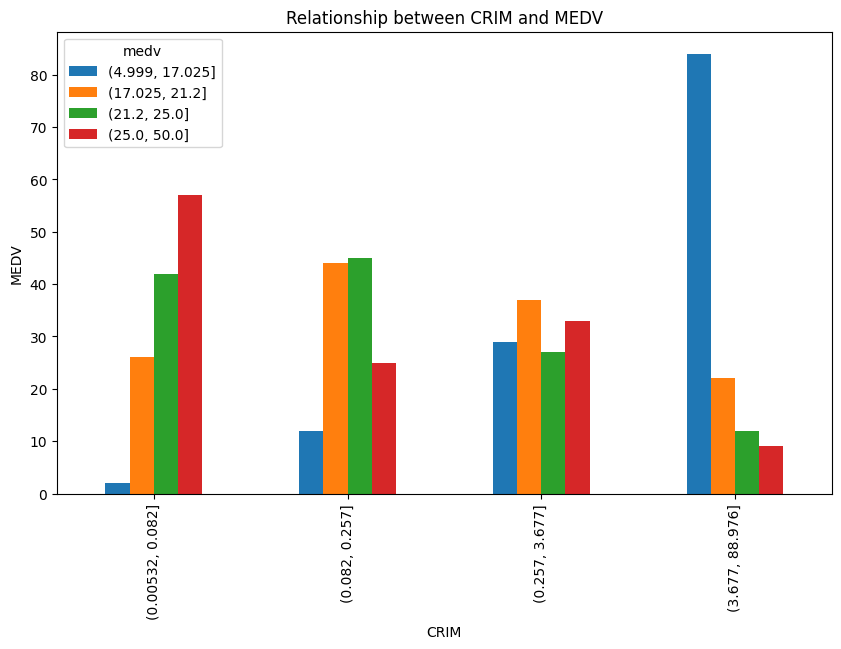

In [ ]:
import matplotlib.pyplot as plt

# Assuming boston_binned is your dataframe and 'crim' and 'medv' are categorical variables
pd.crosstab(boston_binned['crim'], boston_binned['medv']).plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between CRIM and MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()


19.calculate the chi-square and the associated p-value betweeb CRIM and MEDV in boston_binned dataframe.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(boston_binned['crim'], boston_binned['medv'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 195.96280715687166
P-value: 2.3238405860709773e-37


20.Below are the intervals for the variable MEDV in boston_binned dataframe.

- define a dictionary palette of interval names as keys and colors of your choice as values.
- print the dictionary

In [ ]:
boston_binned['medv'].value_counts()

,count
medv,
"(17.025, 21.2]",129
"(4.999, 17.025]",127
"(21.2, 25.0]",126
"(25.0, 50.0]",124


In [ ]:
palette = {
    '(4.999, 17.025]': 'red',
    '(17.025, 21.2]': 'blue',
    '(21.2, 25.0]': 'green',
    '(25.0, 50.0]': 'yellow'
}

print(palette)

{'(4.999, 17.025]': 'red', '(17.025, 21.2]': 'blue', '(21.2, 25.0]': 'green', '(25.0, 50.0]': 'yellow'}


21.Plotting scatterplots:
    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors.
    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition.

<Axes: xlabel='dis', ylabel='medv'>

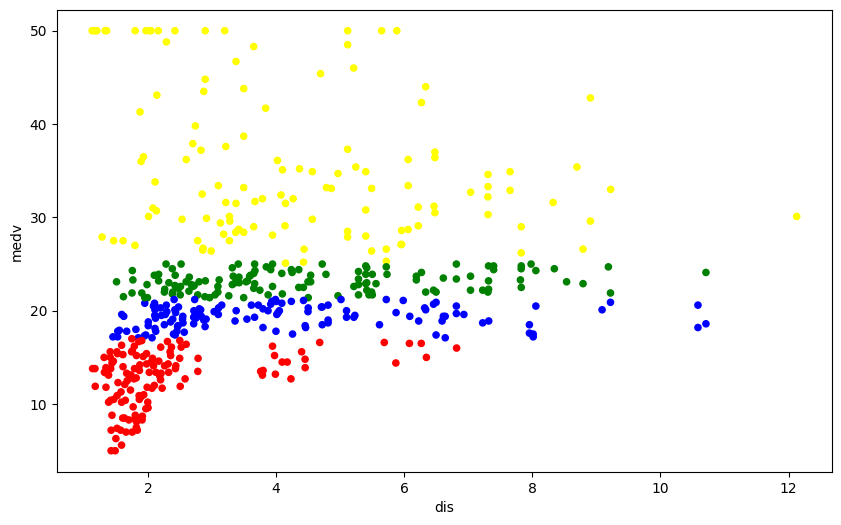

In [ ]:
# there were multiple ways to do the comparison here; I chose to do it with a mixture of the binned and not binned tables.
# I will accept either answer
palette = {pd.Interval(*map(float, k[1:-1].split(',')), closed='right'): v for k, v in palette.items()} # Split the string by comma, convert the values to float, and unpack them as arguments for pd.Interval

colors = [palette[interval] for interval in boston_binned['medv']]
scatter = boston.plot.scatter(x='dis', y='medv', c=colors, figsize=(10, 6))
scatter

22.plotting scatterplots:
    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors.
    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition.

In [ ]:
#21 and 22 are the same question - regardless of your answer in 21, I will include 22 as a bonus point. :)

23.display a scatter matrix with only the following variables:
CRIM, ZN, INDUS, RM and MEDV.

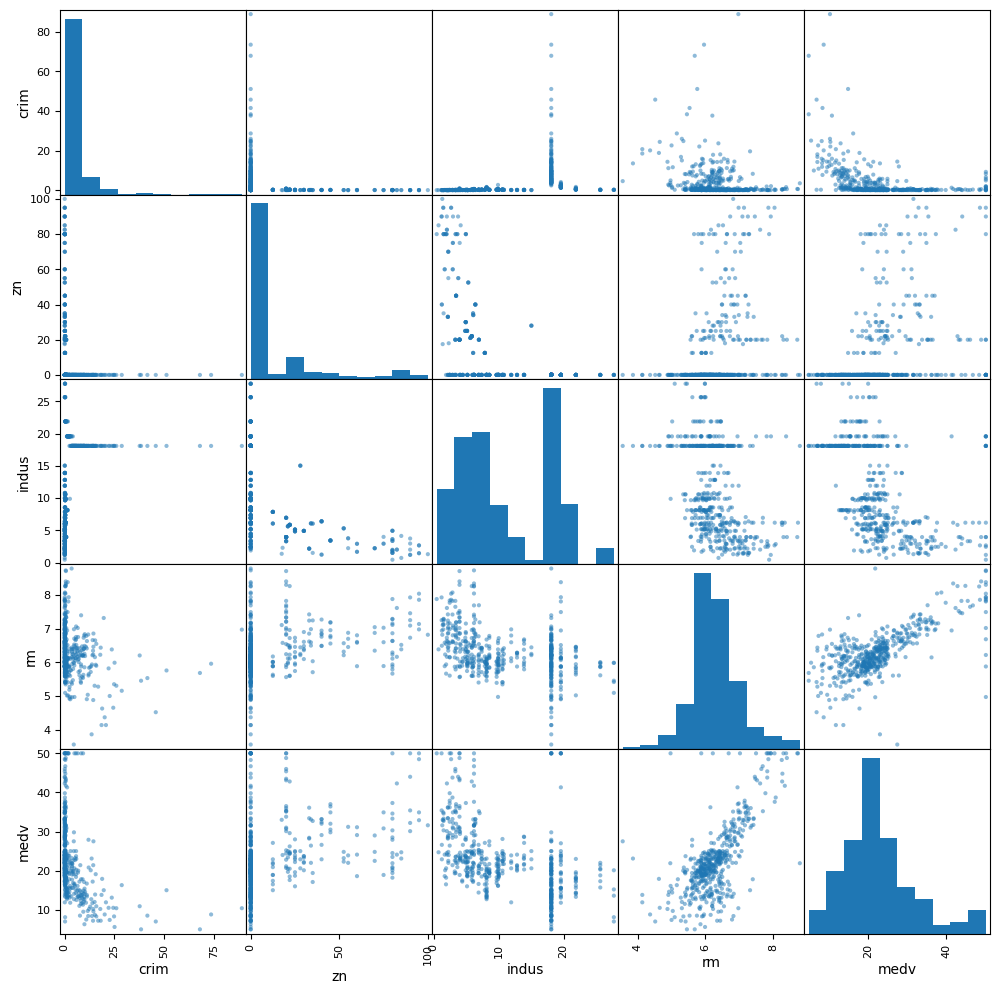

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston[['crim', 'zn', 'indus', 'rm', 'medv']], figsize=(12, 12))
plt.show()